<a href="https://colab.research.google.com/github/kangan14/UML501/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


1.	Load the SMS spam dataset
2.	Convert label: "spam" → 1, "ham" → 0
3.	Text preprocessing:

Lowercase
Remove punctuation
Remove stopwords

4.	Convert text to numeric feature vectors using TF-IDF vectorizer
5.	Train–test split (80/20)
6.	Show class distribution

In [ ]:
# sms_adaboost.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
if 'label' not in df.columns:

    if 'v1' in df.columns and 'v2' in df.columns:
        df = df.rename(columns={'v1':'label','v2':'text'})[['label','text']]
    else:
        raise ValueError("spam.csv doesn't have expected columns. Make sure file has label and text.")

df['label_num'] = df['label'].map({'ham':0,'spam':1})

import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords
stopwords = set(sklearn_stopwords)

def preprocess_text(s):
    s = str(s).lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    tokens = s.split()
    tokens = [t for t in tokens if t not in stopwords]
    return " ".join(tokens)

df['text_clean'] = df['text'].apply(preprocess_text)

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text_clean'])
y = df['label_num'].values

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42, stratify=y)


print("Class distribution (whole dataset):")
print(df['label_num'].value_counts())
print("Train distribution:")
print(pd.Series(y_train).value_counts())
print("Test distribution:")
print(pd.Series(y_test).value_counts())


Class distribution (whole dataset):
label_num
0    4825
1     747
Name: count, dtype: int64
Train distribution:
0    3859
1     598
Name: count, dtype: int64
Test distribution:
0    966
1    149
Name: count, dtype: int64


####Part B — Weak Learner Baseline

Train a Decision Stump:
DecisionTreeClassifier(max_depth=1)
Report:

Train accuracy

Test accuracy

Confusion matrix

Comment on why stump performance is weak on text data


In [ ]:
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_train_pred = stump.predict(X_train)
y_test_pred = stump.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, digits=4))


Train accuracy: 0.8900605788647072
Test accuracy:  0.8860986547085202
Confusion matrix (test):
 [[961   5]
 [122  27]]
              precision    recall  f1-score   support

           0     0.8873    0.9948    0.9380       966
           1     0.8438    0.1812    0.2983       149

    accuracy                         0.8861      1115
   macro avg     0.8655    0.5880    0.6182      1115
weighted avg     0.8815    0.8861    0.8525      1115



A decision stump splits on only one feature, but TF-IDF creates thousands of features. Spam detection requires combinations of keywords, not just one threshold split (stump is too simple).

####Part C — Manual AdaBoost (T = 15 rounds)

Implement AdaBoost from scratch and after each iteration, print:
•	Iteration number
•	Misclassified sample indices
•	Weights of misclassified samples
•	Alpha value
Then update and normalize weights.


Iteration 1
Weighted error: 0.10993942113529281
Alpha: 1.0456800147048289
Number of misclassified samples: 490
Misclassified sample TRAIN indices (local 0..n-1): [   9   15   22   31   39   49   59   66   76   88   93  114  115  121
  123  159  162  166  174  194  203  214  216  224  229  261  300  302
  315  317  319  325  327  331  344  345  351  352  360  361  365  367
  370  371  376  389  404  412  415  419  421  458  459  461  501  516
  533  534  542  546  559  565  580  594  596  602  611  624  626  635
  640  679  681  687  690  701  710  716  717  725  732  742  745  750
  754  757  765  769  776  781  786  788  791  803  810  825  845  859
  870  871  884  913  916  922  925  927  928  930  978 1010 1016 1032
 1038 1042 1046 1072 1080 1090 1098 1112 1114 1125 1131 1147 1214 1218
 1231 1253 1257 1276 1278 1304 1312 1346 1365 1378 1395 1417 1428 1435
 1441 1453 1465 1468 1470 1473 1475 1481 1484 1490 1508 1512 1513 1519
 1521 1522 1524 1553 1556 1558 1564 1579 1597 1613 1624 

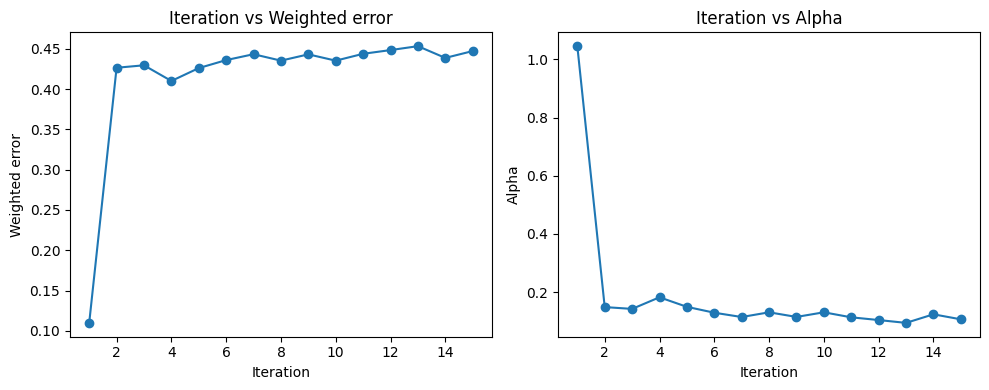

In [ ]:
import math
from sklearn.base import clone
from copy import deepcopy

def manual_adaboost(X_train, y_train, X_test, y_test, T=15):
    # convert labels to +1 / -1 for weight update math
    y_train_bin = np.where(y_train==1, 1, -1)
    y_test_bin = np.where(y_test==1, 1, -1)

    n = X_train.shape[0]
    w = np.ones(n) / n
    classifiers = []
    alphas = []
    train_preds = np.zeros(n)
    test_preds = np.zeros(X_test.shape[0])

    errors = []
    alphas_list = []

    for t in range(1, T+1):
        clf = DecisionTreeClassifier(max_depth=1, random_state=42)
        clf.fit(X_train, y_train, sample_weight=w)
        pred_train = clf.predict(X_train)
        pred_train_bin = np.where(pred_train==1, 1, -1)
        incorrect = (pred_train_bin != y_train_bin).astype(int)

        weighted_error = np.sum(w * incorrect) / np.sum(w)
        if weighted_error == 0:
            alpha = 1e9
        else:
            alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-12))

        # Print info required
        mis_idx = np.where(incorrect==1)[0]
        print(f"\nIteration {t}")
        print("Weighted error:", weighted_error)
        print("Alpha:", alpha)
        print("Number of misclassified samples:", len(mis_idx))
        print("Misclassified sample TRAIN indices (local 0..n-1):", mis_idx[:200])
        print("Weights of these misclassified samples (first 50):", w[mis_idx][:50])


        w = w * np.exp(-alpha * y_train_bin * pred_train_bin)
        w = w / np.sum(w)

        classifiers.append(deepcopy(clf))
        alphas.append(alpha)
        errors.append(weighted_error)
        alphas_list.append(alpha)
        train_preds += alpha * pred_train_bin
        pred_test = clf.predict(X_test)
        pred_test_bin = np.where(pred_test==1, 1, -1)
        test_preds += alpha * pred_test_bin


        if weighted_error == 0:
            print("Perfect classifier encountered; stopping early.")
            break


    final_train_pred = np.where(train_preds >= 0, 1, 0)
    final_test_pred = np.where(test_preds >= 0, 1, 0)

    print("\nFinal Train accuracy:", accuracy_score(y_train, final_train_pred))
    print("Final Test accuracy :", accuracy_score(y_test, final_test_pred))
    print("Final Confusion matrix (test):\n", confusion_matrix(y_test, final_test_pred))

    # Plots
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(1,len(errors)+1), errors, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Weighted error")
    plt.title("Iteration vs Weighted error")

    plt.subplot(1,2,2)
    plt.plot(range(1,len(alphas_list)+1), alphas_list, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Alpha")
    plt.title("Iteration vs Alpha")
    plt.tight_layout()
    plt.show()

    return classifiers, alphas

# run
clfs_manual, alphas_manual = manual_adaboost(X_train, y_train, X_test, y_test, T=15)


####Part D — Sklearn AdaBoost

Train:
AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6
)

Report:
•	Train accuracy
•	Test accuracy
•	Confusion matrix
•	Compare performance with manual implementation


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.6,
    random_state=42
)
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

print("Sklearn AdaBoost Train acc:", accuracy_score(y_train, y_train_pred))
print("Sklearn AdaBoost Test acc: ", accuracy_score(y_test, y_test_pred))
print("Confusion matrix (test):\n", confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, digits=4))


Sklearn AdaBoost Train acc: 0.9028494503028943
Sklearn AdaBoost Test acc:  0.9040358744394619
Confusion matrix (test):
 [[966   0]
 [107  42]]
              precision    recall  f1-score   support

           0     0.9003    1.0000    0.9475       966
           1     1.0000    0.2819    0.4398       149

    accuracy                         0.9040      1115
   macro avg     0.9501    0.6409    0.6937      1115
weighted avg     0.9136    0.9040    0.8797      1115



####Q2 – HEART DISEASE DATASET Part A — Weak Learner Baseline

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load local dataset
df = pd.read_csv("/content/heart.csv")

print(df.head())

# Separate features & target
X = df.drop("target", axis=1)
y = df["target"]

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_scaled, y)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

y_pred = stump.predict(X_test)

print("Training Accuracy:", stump.score(X_train, y_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Training Accuracy: 0.7396694214876033
Test Accuracy: 0.8360655737704918

Confusion Matrix:
[[26  3]
 [ 7 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



####Part B — AdaBoost Grid Search

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

n_estimators_list = [5, 10, 25, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

results = {}

for lr in learning_rates:
    acc_list = []
    for n in n_estimators_list:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        acc_list.append(acc)

        print(f"LR={lr}, Estimators={n}, Accuracy={acc:.4f}")

    results[lr] = acc_list


LR=0.1, Estimators=5, Accuracy=0.9016
LR=0.1, Estimators=10, Accuracy=0.8852
LR=0.1, Estimators=25, Accuracy=0.8852
LR=0.1, Estimators=50, Accuracy=0.8689
LR=0.1, Estimators=100, Accuracy=0.8525
LR=0.5, Estimators=5, Accuracy=0.8689
LR=0.5, Estimators=10, Accuracy=0.8525
LR=0.5, Estimators=25, Accuracy=0.8525
LR=0.5, Estimators=50, Accuracy=0.8361
LR=0.5, Estimators=100, Accuracy=0.8525
LR=1.0, Estimators=5, Accuracy=0.8689
LR=1.0, Estimators=10, Accuracy=0.8525
LR=1.0, Estimators=25, Accuracy=0.8689
LR=1.0, Estimators=50, Accuracy=0.8197
LR=1.0, Estimators=100, Accuracy=0.8197


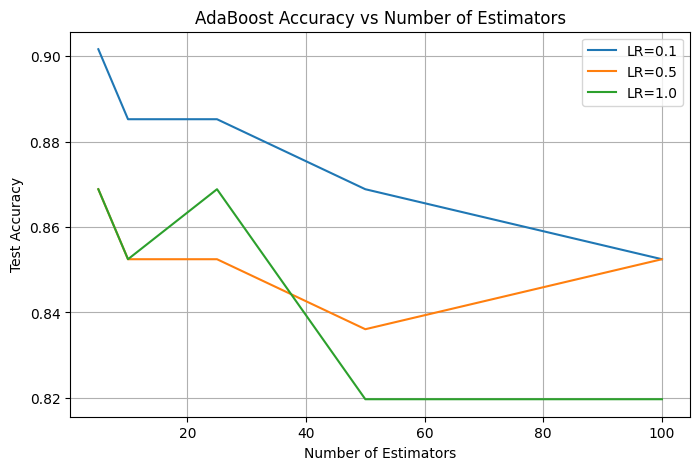

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for lr in learning_rates:
    plt.plot(n_estimators_list, results[lr], label=f"LR={lr}")

plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
best_lr = None
best_n = None
best_acc = 0

for lr in learning_rates:
    for i, acc in enumerate(results[lr]):
        if acc > best_acc:
            best_acc = acc
            best_lr = lr
            best_n = n_estimators_list[i]

print("Best Accuracy:", best_acc)
print("Best Learning Rate:", best_lr)
print("Best n_estimators:", best_n)


Best Accuracy: 0.9016393442622951
Best Learning Rate: 0.1
Best n_estimators: 5


####Part C — Misclassification Pattern

In [ ]:
best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_n,
    learning_rate=best_lr,
    random_state=42
)

best_model.fit(X_train, y_train)

errors = best_model.estimator_errors_
weights = best_model.estimator_weights_


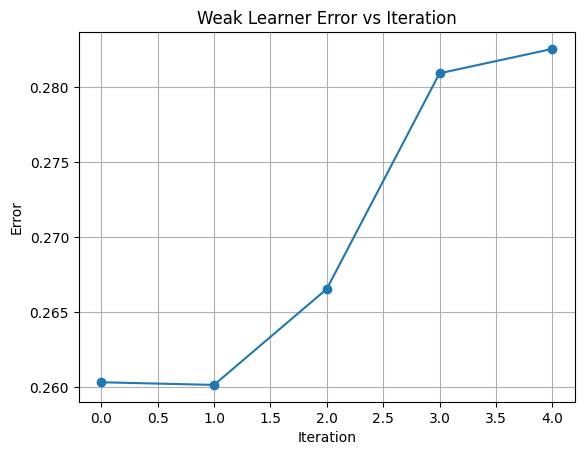

In [ ]:
plt.plot(errors, marker='o')
plt.title("Weak Learner Error vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(True)
plt.show()


Samples that remained misclassified received effectively higher boosting influence.
AdaBoost focuses on:
• borderline patients
• conflicting or rare feature combinations
• cases with mild symptoms but positive diagnosis
These are clinically harder examples.

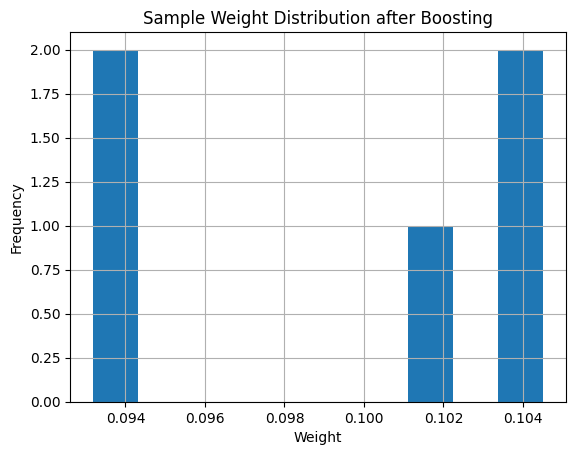

In [ ]:
plt.hist(best_model.estimator_weights_, bins=10)
plt.title("Sample Weight Distribution after Boosting")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


####Q3. Part A — Data Preparation

In [4]:
# ---- 1. LOAD RAW TXT ----
file_path = "/content/WISDM_ar_v1.1_raw.txt"

rows = []

with open(file_path, "r") as f:
    for line in f:
        line = line.strip()

        # skip empty / partial lines
        if not line or line.count(",") < 5:
            continue

        # remove trailing semicolon
        line = line.replace(";", "")

        parts = line.split(",")

        # ensure correct length
        if len(parts) != 6:
            continue

        user, activity, ts, x, y, z = parts
        rows.append([user, activity, ts, x, y, z])

df = pd.DataFrame(rows, columns=["user", "activity", "timestamp", "x", "y", "z"])

print(df.head(), df.shape)
# ---- 2. CLEAN TRAILING SEMICOLONS ----
df['z'] = df['z'].astype(str).str.replace(";", "", regex=False)

# Convert to numeric
df[['x','y','z']] = df[['x','y','z']].apply(pd.to_numeric, errors='coerce')

# ---- 3. DROP DIRTY / MISSING ----
df = df.dropna()

# ---- 4. CREATE BINARY LABEL ----
vigorous = ["jogging", "upstairs"]
df['label'] = df['activity'].str.lower().apply(lambda a: 1 if a in vigorous else 0)

# Keep only accelerometer features
X = df[['x','y','z']].values
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)


  user activity       timestamp            x          y            z
0   33  Jogging  49105962326000   -0.6946377  12.680544   0.50395286
1   33  Jogging  49106062271000     5.012288  11.264028   0.95342433
2   33  Jogging  49106112167000     4.903325  10.882658  -0.08172209
3   33  Jogging  49106222305000  -0.61291564  18.496431    3.0237172
4   33  Jogging  49106332290000   -1.1849703  12.108489     7.205164 (1086466, 6)
Train: (760525, 3)  Test: (325940, 3)


####PART B — DECISION STUMP BASELINE

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

y_pred_train = stump.predict(X_train)
y_pred_test = stump.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Train Accuracy: 0.6521258341277407
Test Accuracy: 0.6519021905872247

Confusion Matrix:
 [[170673  17473]
 [ 95986  41808]]


A depth-1 tree picks one axis + threshold, e.g.:

y > 12.3 → vigorous

Stumps are weak — perfect for AdaBoost.

####PART C — MANUAL ADABOOST (T = 20)

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

T = 20
N = len(X_train)

# Convert 0/1 → −1/+1
y_train_bin = np.where(y_train == 0, -1, 1)

weights = np.ones(N) / N
alphas = []
errors = []

stumps = []

for t in range(T):
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(X_train, y_train_bin, sample_weight=weights)

    pred = stump.predict(X_train)
    misclassified = (pred != y_train_bin)

    err = np.sum(weights[misclassified])
    errors.append(err)

    # avoid division error
    err = max(err, 1e-10)

    alpha = 0.5 * np.log((1 - err) / err)
    alphas.append(alpha)

    # Print required info
    print(f"\nITERATION {t+1}")
    print("Misclassified indices:", np.where(misclassified)[0][:10], "...")
    print("Weights of misclassified samples:", weights[misclassified][:10])

    # Update weights
    weights *= np.exp(-alpha * y_train_bin * pred)
    weights /= np.sum(weights)

    stumps.append(stump)

# ---- Final boosted prediction ----
def ada_predict(X):
    scores = np.zeros(len(X))
    for alpha, stump in zip(alphas, stumps):
        scores += alpha * stump.predict(X)
    return np.where(scores >= 0, 1, 0)

y_train_pred = ada_predict(X_train)
y_test_pred = ada_predict(X_test)

print("\nFinal Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Final Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



ITERATION 1
Misclassified indices: [ 0  2  3  5  6  7  8 12 13 16] ...
Weights of misclassified samples: [1.31488117e-06 1.31488117e-06 1.31488117e-06 1.31488117e-06
 1.31488117e-06 1.31488117e-06 1.31488117e-06 1.31488117e-06
 1.31488117e-06 1.31488117e-06]

ITERATION 2
Misclassified indices: [ 0  1  2  5  6  8 10 12 13 16] ...
Weights of misclassified samples: [1.88988045e-06 1.00814988e-06 1.88988045e-06 1.88988045e-06
 1.88988045e-06 1.88988045e-06 1.00814988e-06 1.88988045e-06
 1.88988045e-06 1.88988045e-06]

ITERATION 3
Misclassified indices: [ 4  7  9 11 14 15 18 21 23 24] ...
Weights of misclassified samples: [9.42022415e-07 1.76591772e-06 9.42022415e-07 9.42022415e-07
 9.42022415e-07 9.42022415e-07 9.42022415e-07 9.42022415e-07
 9.42022415e-07 9.42022415e-07]

ITERATION 4
Misclassified indices: [ 0  1  2  3  5 10 12 13 16 17] ...
Weights of misclassified samples: [1.84398113e-06 9.83665058e-07 1.84398113e-06 1.60207701e-06
 1.84398113e-06 9.83665058e-07 1.84398113e-06 1.84398

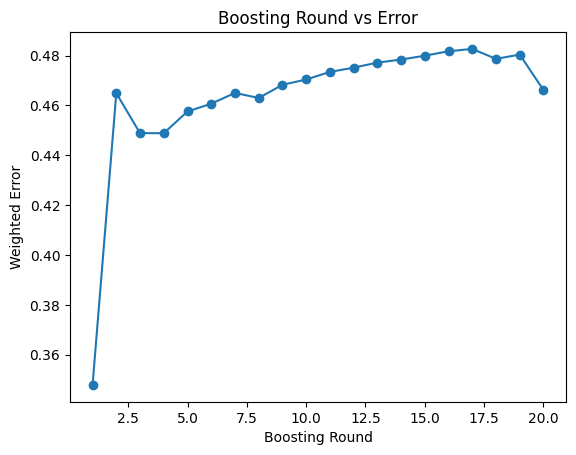

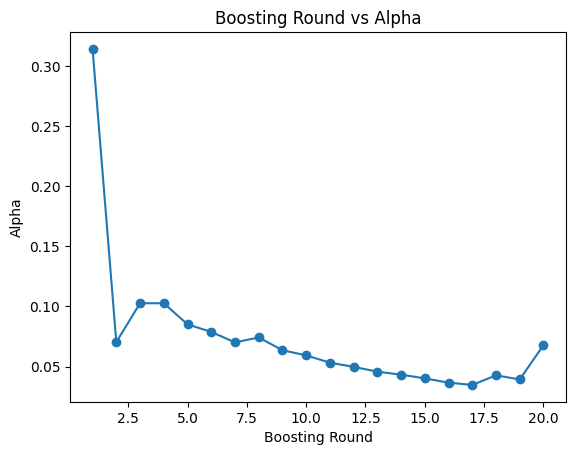

In [8]:
plt.plot(range(1, T+1), errors, marker='o')
plt.xlabel("Boosting Round")
plt.ylabel("Weighted Error")
plt.title("Boosting Round vs Error")
plt.show()

plt.plot(range(1, T+1), alphas, marker='o')
plt.xlabel("Boosting Round")
plt.ylabel("Alpha")
plt.title("Boosting Round vs Alpha")
plt.show()


####PART D — SKLEARN ADABOOST

In [9]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred_train_s = ada.predict(X_train)
y_pred_test_s = ada.predict(X_test)

print("Sklearn Train Accuracy:", accuracy_score(y_train, y_pred_train_s))
print("Sklearn Test Accuracy:", accuracy_score(y_test, y_pred_test_s))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test_s))


Sklearn Train Accuracy: 0.6976115183590283
Sklearn Test Accuracy: 0.6969166104190956

Confusion Matrix:
 [[164210  23936]
 [ 74851  62943]]



sklearn version usually higher accuracy

smoother weight updates

more rounds = better separation